In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
inst = pd.read_csv("data/installs.csv", dtype = {"application_id": np.int16, "click_hash": np.float16})

In [6]:
inst.count()

created               3412
application_id        3412
ref_type              3412
ref_hash              3412
click_hash               0
attributed            3412
implicit              3412
device_countrycode    3412
device_brand          1047
device_model          3411
session_user_agent    3364
user_agent            1729
event_uuid             865
kind                   865
wifi                  1729
trans_id                 6
ip_address            3412
device_language       3378
dtype: int64

In [7]:
inst.ip_address.count()

3412

In [8]:
inst.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [9]:
inst.user_agent.unique()

array([nan, 'Dalvik/2.1.0 (Linux; U; Android 22; SM-J200M Build/LMY47X)',
       'Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-G570M Build/R16NW)',
       'Dalvik/2.1.0 (Linux; U; Android 6.0; MotoG3-TE Build/MPDS24.65-33-1-30)',
       'Dalvik/2.1.0 (Linux; U; Android 8.1.0; Redmi 6 MIUI/V10.2.5.0.OCGMIXM)',
       'Dalvik/2.1.0 (Linux; U; Android 5.1.1; SM-G531H Build/LMY48B)',
       'Dalvik/2.1.0 (Linux; U; Android 7.1.1; Moto G Play Build/NPIS26.48-43-2)',
       'Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M400 Build/NRD90U)',
       'Dalvik/2.1.0 (Linux; U; Android 8.0.0; SM-A605GN Build/R16NW)',
       'Dalvik/2.1.0 (Linux; U; Android 7.1.2; LM-X410.F Build/N2G47H)',
       'Dalvik/2.1.0 (Linux; U; Android 9; moto g(6) plus Build/PPWS29.116-16-2)',
       'Dalvik/2.1.0 (Linux; U; Android 9; motorola one Build/PPKS29.68-16-21-3)',
       'Dalvik/2.1.0 (Linux; U; Android 5.1.1; SM-J320M Build/LMY47V)',
       'Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M250 Build/NRD90U)',
       'Dalvik/2

In [10]:
count_user = inst.user_agent.dropna()
count_user = count_user.transform(lambda x: x[0:6]).dropna().value_counts()
count_user.index = ['Dalvik', 'Mercado Pago', 'NextGen', 'HotelUrbano', 'PeixenUrbano', 'Takeal', 'Mozilla']
count_user.head(5)


Dalvik          956
Mercado Pago    731
NextGen          20
HotelUrbano      13
PeixenUrbano      7
Name: user_agent, dtype: int64

# ver otra manera de deducir tipos de dispositivos y no a ojo

In [11]:
count_user.index

Index(['Dalvik', 'Mercado Pago', 'NextGen', 'HotelUrbano', 'PeixenUrbano',
       'Takeal', 'Mozilla'],
      dtype='object')

In [12]:
count_user.head(10)

Dalvik          956
Mercado Pago    731
NextGen          20
HotelUrbano      13
PeixenUrbano      7
Takeal            1
Mozilla           1
Name: user_agent, dtype: int64

Text(0.5, 0, 'Agente de usuario relacionado al dispositivo')

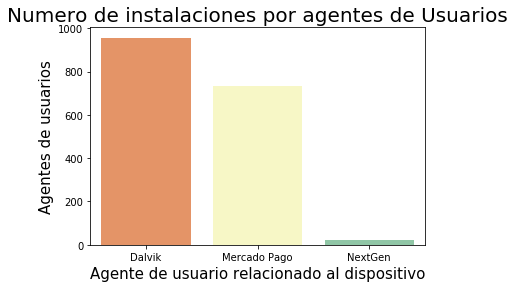

In [13]:
grf2 = sns.barplot(x = count_user[0:3].index, y = count_user[0:3].values, orient = 'v', palette = 'Spectral') 
grf2.set_title("Numero de instalaciones por agentes de Usuarios", fontsize = 20)
grf2.set_ylabel("Agentes de usuarios", fontsize = 15)
grf2.set_xlabel("Agente de usuario relacionado al dispositivo", fontsize = 15)

In [14]:
dalvik = inst[inst['user_agent'].str.contains(r"\Dalvik\b", case=False, na=False, regex=True)].reset_index()

In [15]:
dalvik = dalvik.user_agent.dropna()

In [16]:
def parser(values):
    dispositivo = []
    for x in values:
        inicio=x[30:].find(";")+30
        final=x.find("Build/")
        dispositivo.append(x[inicio+1:final])
    return dispositivo

In [17]:
dispositivos=parser(dalvik.values)

In [18]:
d_dalvik=pd.DataFrame(dispositivos)

In [19]:
marcas = d_dalvik[0].transform(lambda x: x[0:3]).dropna().value_counts()
#marcas.index = ['Dalvik', 'Mercado Pago', 'NextGen', 'HotelUrbano', 'PeixenUrbano', 'Takeal', 'Mozilla']
marcas.head()

 SM    460
 Mo    122
 LG    101
 Re     49
 mo     41
Name: 0, dtype: int64

Text(0.5, 0, 'Modelos de moviles')

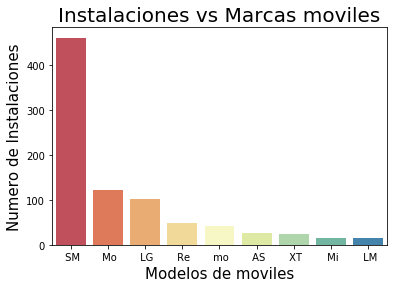

In [20]:
grf3 = sns.barplot(x = marcas[0:9].index, y = marcas[0:9].values, orient = 'v', palette = 'Spectral') 
grf3.set_title("Instalaciones vs Marcas moviles", fontsize = 20)
grf3.set_ylabel("Numero de Instalaciones", fontsize = 15)
grf3.set_xlabel("Modelos de moviles", fontsize = 15)

In [21]:
mercadopago = inst[inst['user_agent'].str.contains('Mercadopago', case=False, na=False, regex=True)].reset_index()

In [22]:
mercadopago = mercadopago.user_agent.dropna()

In [23]:
nextgen = inst[inst['user_agent'].str.contains('NextGen', case=False, na=False, regex=True)].reset_index()

In [24]:
nextgen = nextgen.user_agent.dropna()

In [28]:
inst.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'click_hash',
       'attributed', 'implicit', 'device_countrycode', 'device_brand',
       'device_model', 'session_user_agent', 'user_agent', 'event_uuid',
       'kind', 'wifi', 'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [30]:
inst.dtypes

created                object
application_id          int16
ref_type                int64
ref_hash                int64
click_hash            float16
attributed               bool
implicit                 bool
device_countrycode      int64
device_brand          float64
device_model          float64
session_user_agent     object
user_agent             object
event_uuid             object
kind                   object
wifi                   object
trans_id               object
ip_address              int64
device_language       float64
dtype: object

In [167]:
inst.loc[:,'created'] = pd.to_datetime(inst['created'], errors='coerce')

In [168]:
inst.dtypes

created               datetime64[ns]
application_id                 int16
ref_type                       int64
ref_hash                       int64
click_hash                   float16
attributed                      bool
implicit                        bool
device_countrycode             int64
device_brand                 float64
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
trans_id                      object
ip_address                     int64
device_language              float64
dtype: object

In [169]:
group=inst[['created','user_agent']].groupby('created').sum()

In [170]:
group = group[group['user_agent'].str.contains(r"\Dalvik\b", case=False, na=False, regex=True)].reset_index()

In [171]:
group.head(5)

,created,user_agent
0,2019-03-05 00:05:35.234,Dalvik/2.1.0 (Linux; U; Android 9; HMA-L09 Bui...
1,2019-03-05 00:07:25.431,Dalvik/2.1.0 (Linux; U; Android 9; ONEPLUS A60...
2,2019-03-05 00:12:34.027,Dalvik/1.6.0 (Linux; U; Android 4.2.2; GT-I906...
3,2019-03-05 00:17:46.709,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J410...
4,2019-03-05 00:36:34.347,Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M250 B...


In [172]:
dispositivos=parser(group['user_agent'])

In [173]:
dispositivos=pd.DataFrame(dispositivos)

In [174]:
dispositivos = dispositivos[0].transform(lambda x: x[0:3])

In [175]:
dispositivos.head()

0     HM
1     ON
2     GT
3     SM
4     LG
Name: 0, dtype: object

In [176]:
group['dispositivo']=dispositivos

In [177]:
#group.groupby('created').agg({'dispositivo':'sum'}).sort_values('dispositivo',ascending=False).head(100)

In [178]:
group.head(5)

,created,user_agent,dispositivo
0,2019-03-05 00:05:35.234,Dalvik/2.1.0 (Linux; U; Android 9; HMA-L09 Bui...,HM
1,2019-03-05 00:07:25.431,Dalvik/2.1.0 (Linux; U; Android 9; ONEPLUS A60...,ON
2,2019-03-05 00:12:34.027,Dalvik/1.6.0 (Linux; U; Android 4.2.2; GT-I906...,GT
3,2019-03-05 00:17:46.709,Dalvik/2.1.0 (Linux; U; Android 8.1.0; SM-J410...,SM
4,2019-03-05 00:36:34.347,Dalvik/2.1.0 (Linux; U; Android 7.0; LG-M250 B...,LG


In [179]:
#nextgen = inst[inst['user_agent'].str.contains('NextGen', case=False, na=False, regex=True)].reset_index()

In [190]:
sm = group[group['dispositivo'].str.contains('SM', case=False, na=False, regex=True)].reset_index()

In [191]:
lg = group[group['dispositivo'].str.contains('LG', case=False, na=False, regex=True)].reset_index()

Text(0, 0.5, 'Instalaciones')

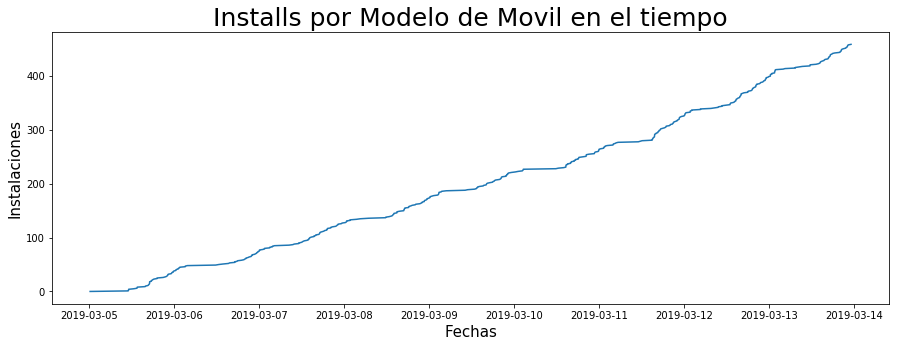

In [192]:
plt.figure(figsize=(15,5))
plot1 = sns.lineplot(x = sm.created, y = sm.index)
plot1.set_title("Installs por Modelo de Movil en el tiempo", fontsize = 25)
plot1.set_xlabel("Fechas", fontsize = 15)
plot1.set_ylabel("Instalaciones", fontsize = 15)